### 数据处理
1. 重复样本处理<br>
2. 异常值检测与处理<br>
3. 缺失值检测与处理<br>
4. 数据标准化

### 特征工程
1. 特征选择
2. 特征构造 -- 特征选择
3. 特征编码

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings  # 再次导入warnings，可能是为了确保在代码其他部分也能控制警告
# warnings.filterwarnings("ignore")  # 忽略警告消息，使输出更清洁

# 设置中文字体支持（避免图表中文乱码）
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# plt.rcParams['axes.unicode_minus'] = False
# sns.set_style('whitegrid') # 设置seaborn风格

## 一、数据概况

In [57]:
# 读取数据
train_data = pd.read_csv('data_set/heart.csv')

In [58]:
train_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [59]:
print('数据基本信息：')
train_data.info()

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [60]:
# 查看数据集行数和列数
rows, columns = train_data.shape
print(f"样本数量: {rows}")
print(f"特征数量: {columns}")

样本数量: 918
特征数量: 12


In [61]:
print("\n数据类型分布：")
train_data.dtypes.value_counts()


数据类型分布：


int64      6
object     5
float64    1
Name: count, dtype: int64

In [62]:
print("前10行数据:")
train_data.head(10)

前10行数据:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [63]:
# 查看所有类型特征的描述统计
train_data.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [64]:
# 检查缺失值
print("缺失值统计:\n", train_data.isnull().sum().sort_values(ascending=False).head(10))

缺失值统计:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
dtype: int64


In [65]:
# 检查重复值
print("重复值：",train_data.duplicated().sum())

重复值： 0


### 结论
- 数据规模：3770*30 <br>
- 缺失值：部分列存在缺失值，但缺失比例均不高，需要进行缺失值填充<br>
- 重复行：存在重复行<br>
- 特征类型：存在数值特征6个、非数值型特征24个<br>

## 二、数据清洗

### 2.1 特征类型识别

In [66]:
# 识别数值型特征
numeric_cols = [col for col in train_data.select_dtypes(include=[np.number]).columns 
                if col != 'binaryClass']

In [67]:
# 识别潜在的分类特征（唯一值较少的数值列）
potential_categorical = []
num_cols = []  # 真正的连续数值特征

for col in numeric_cols:
    if train_data[col].nunique() <= 11 :
        potential_categorical.append(col)
    else:
        num_cols.append(col)
        
print(f"数值型分类特征数量: {len(potential_categorical)}")
print(f"数值特征数量: {len(num_cols)}")

数值型分类特征数量: 2
数值特征数量: 5


In [68]:
print("数值型分类特征:",potential_categorical)
print("数值特征: ",num_cols)

数值型分类特征: ['FastingBS', 'HeartDisease']
数值特征:  ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


In [69]:
# 识别文本型特征
text_cols = [col for col in train_data.select_dtypes(include=['object', 'category']).columns 
             if col != 'binaryClass']

print(f"文本型特征数量: {len(text_cols)}")
print("文本型特征:",text_cols)

文本型特征数量: 5
文本型特征: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [70]:
# 数值型分类特征与文本特征汇总为分类特征
if len(potential_categorical)==0:
    categorical_cols = text_cols
else:
    categorical_cols = potential_categorical + text_cols

# 确保categorical_cols中的列都存在于当前的train_df中
categorical_cols = [col for col in categorical_cols if col in train_df.columns]

In [71]:
print(f"数值型特征数量: {len(num_cols)}")
print(f"分类特征数量: {len(categorical_cols)}")

数值型特征数量: 5
分类特征数量: 6


### 2.2 处理异常值

In [72]:
train_df = train_data.copy()

#### 2.2.1 使用IQR（四分位距）方法检测数据中异常值

In [73]:
def outlier_thresholds(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper

def check_outliers(data, col):
    lower, upper = outlier_thresholds(data, col)
    return data[(data[col] < lower) | (data[col] > upper)]

print('异常列\t\t异常值数量')
for col in num_cols:
    print(f"{col.ljust(20)}\t{len(check_outliers(train_df, col))}")

异常列		异常值数量
Age                 	0
RestingBP           	28
Cholesterol         	183
MaxHR               	2
Oldpeak             	16


#### 2.2.2 检测并替换指定列中的异常值为该列的中位数

In [74]:
def replace_outliers_with_median(data, col):
    lower, upper = outlier_thresholds(data, col)
    median = data[col].median()
    data[col] = np.where((data[col] < lower) | (data[col] > upper), median, data[col])

for col in num_cols:
    replace_outliers_with_median(train_df, col)

#### 2.2.3 查看替换异常值后的箱线图

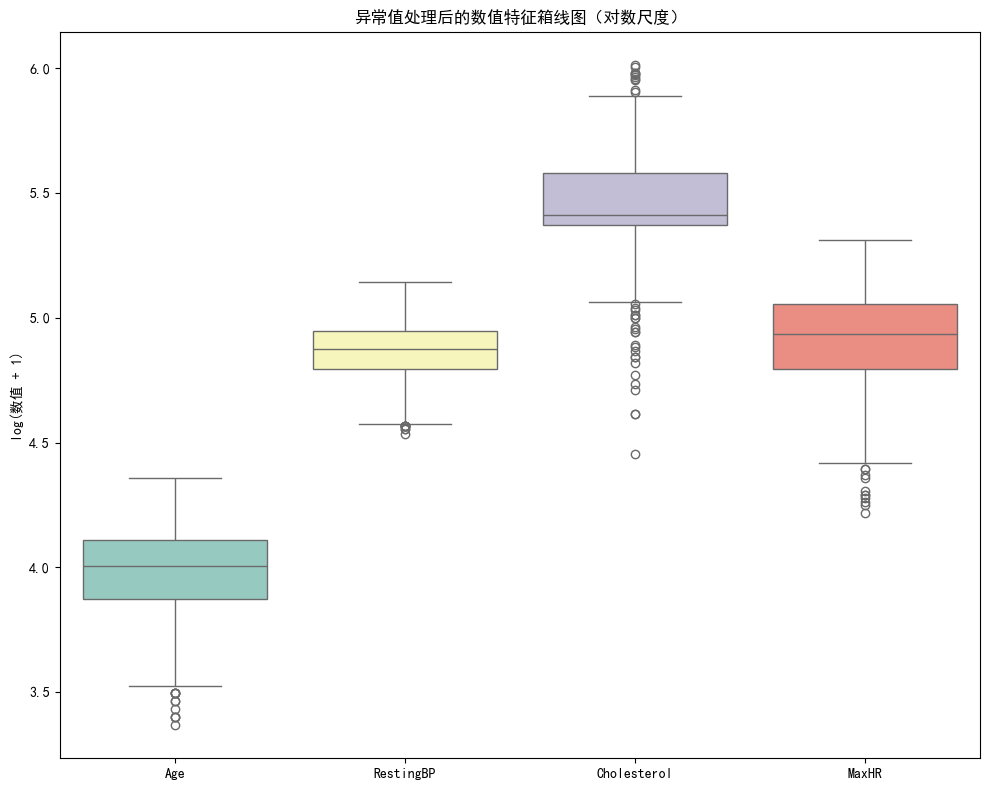

In [75]:
features_to_plot = [col for col in num_cols if (train_df[col] >= 0).all()]
plt.figure(figsize=(10, 8))  
sns.boxplot(data=np.log1p(train_df[features_to_plot]), palette='Set3')   # 对数尺度
plt.title('异常值处理后的数值特征箱线图（对数尺度）')
plt.ylabel('log(数值 + 1)')
plt.tight_layout()
plt.show()

### 2.3 处理重复行

In [76]:
print(f"去重前数据形状: {train_df.shape}")

# 删除完全重复的行
train_df_clean = train_df.drop_duplicates()

print(f"去重后数据形状: {train_df_clean.shape}")
print(f"删除了 {len(train_df) - len(train_df_clean)} 个重复行")

去重前数据形状: (918, 12)
去重后数据形状: (918, 12)
删除了 0 个重复行


In [77]:
print("重复行数量：",train_df_clean.duplicated().sum())

重复行数量： 0


In [78]:
train_df = train_df_clean

### 2.4 处理空值

#### 2.4.1 连续数值特征用中位数填充

In [79]:
# 连续数值特征用中位数填充
if num_cols:
    train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].median())
    print("连续数值特征缺失值已用中位数填充")

连续数值特征缺失值已用中位数填充


In [80]:
# 分类型特征用众数填充
if categorical_cols:
    for col in categorical_cols:
        if train_df[col].notna().any():
            mode_val = train_df[col].mode()[0] if not train_df[col].mode().empty else "MISSING"
            train_df[col] = train_df[col].fillna(mode_val)
    print("分类特征缺失值已用众数填充")

分类特征缺失值已用众数填充


In [81]:
# 检查是否填充完整
print("缺失值统计:\n", train_df.isnull().sum().sum())

缺失值统计:
 0


In [82]:
# 检查是否填充完整
print("缺失值统计:\n", train_df.isnull().sum().sort_values(ascending=False).head(10))

缺失值统计:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
dtype: int64


#### 缺失值处理效果验证

### 2.5 分离目标变量

In [83]:
# 分离目标变量
y = train_df.pop('HeartDisease')   # 删除列名指定的列,同时将结果返回到y_train

## 三、数据预处理

### 3.1 数据标准化

In [84]:
# Z-score标准化 (x - μ) / σ
original_data = train_df[num_cols].copy()
z_score_data = (original_data - original_data.mean()) / original_data.std()

In [85]:
z_score_data

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,-1.432359,0.571928,1.112597,1.388977,-0.865766
1,-0.478223,1.854209,-1.239583,0.754451,0.178065
2,-1.750404,-0.069212,0.983119,-1.545708,-0.865766
3,-0.584238,0.443700,-0.505876,-1.149129,0.699981
4,0.051853,1.213068,-0.915889,-0.593918,-0.865766
...,...,...,...,...,...
913,-0.902283,-1.351493,0.573106,-0.197339,0.386832
914,1.536064,0.828384,-0.959048,0.159582,2.683260
915,0.369898,-0.069212,-2.296985,-0.871523,0.386832
916,0.369898,-0.069212,-0.031124,1.468293,-0.865766


In [86]:
# 输出标准化前后的对比（前5行）
print("=== 标准化前后数据对比（前5行） ===")
print("\n原始数据：")
print(original_data.head())

print("\nZ-score标准化后数据（均值≈0，标准差≈1）：")
print(z_score_data.head())
print("\nZ-score标准化后统计量：")
print(pd.DataFrame({
    '均值': z_score_data.mean().round(4),
    '标准差': z_score_data.std().round(4)
}))

=== 标准化前后数据对比（前5行） ===

原始数据：
    Age  RestingBP  Cholesterol  MaxHR  Oldpeak
0  40.0      140.0        289.0  172.0      0.0
1  49.0      160.0        180.0  156.0      1.0
2  37.0      130.0        283.0   98.0      0.0
3  48.0      138.0        214.0  108.0      1.5
4  54.0      150.0        195.0  122.0      0.0

Z-score标准化后数据（均值≈0，标准差≈1）：
        Age  RestingBP  Cholesterol     MaxHR   Oldpeak
0 -1.432359   0.571928     1.112597  1.388977 -0.865766
1 -0.478223   1.854209    -1.239583  0.754451  0.178065
2 -1.750404  -0.069212     0.983119 -1.545708 -0.865766
3 -0.584238   0.443700    -0.505876 -1.149129  0.699981
4  0.051853   1.213068    -0.915889 -0.593918 -0.865766

Z-score标准化后统计量：
              均值  标准差
Age         -0.0  1.0
RestingBP   -0.0  1.0
Cholesterol  0.0  1.0
MaxHR       -0.0  1.0
Oldpeak     -0.0  1.0


In [87]:
train_df_std = train_df.copy()
train_df_std[num_cols] = z_score_data
train_df_std.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.432359,M,ATA,0.571928,1.112597,0,Normal,1.388977,N,-0.865766,Up
1,-0.478223,F,NAP,1.854209,-1.239583,0,Normal,0.754451,N,0.178065,Flat
2,-1.750404,M,ATA,-0.069212,0.983119,0,ST,-1.545708,N,-0.865766,Up
3,-0.584238,F,ASY,0.443700,-0.505876,0,Normal,-1.149129,Y,0.699981,Flat
4,0.051853,M,NAP,1.213068,-0.915889,0,Normal,-0.593918,N,-0.865766,Up


标准化后的数值特征分布

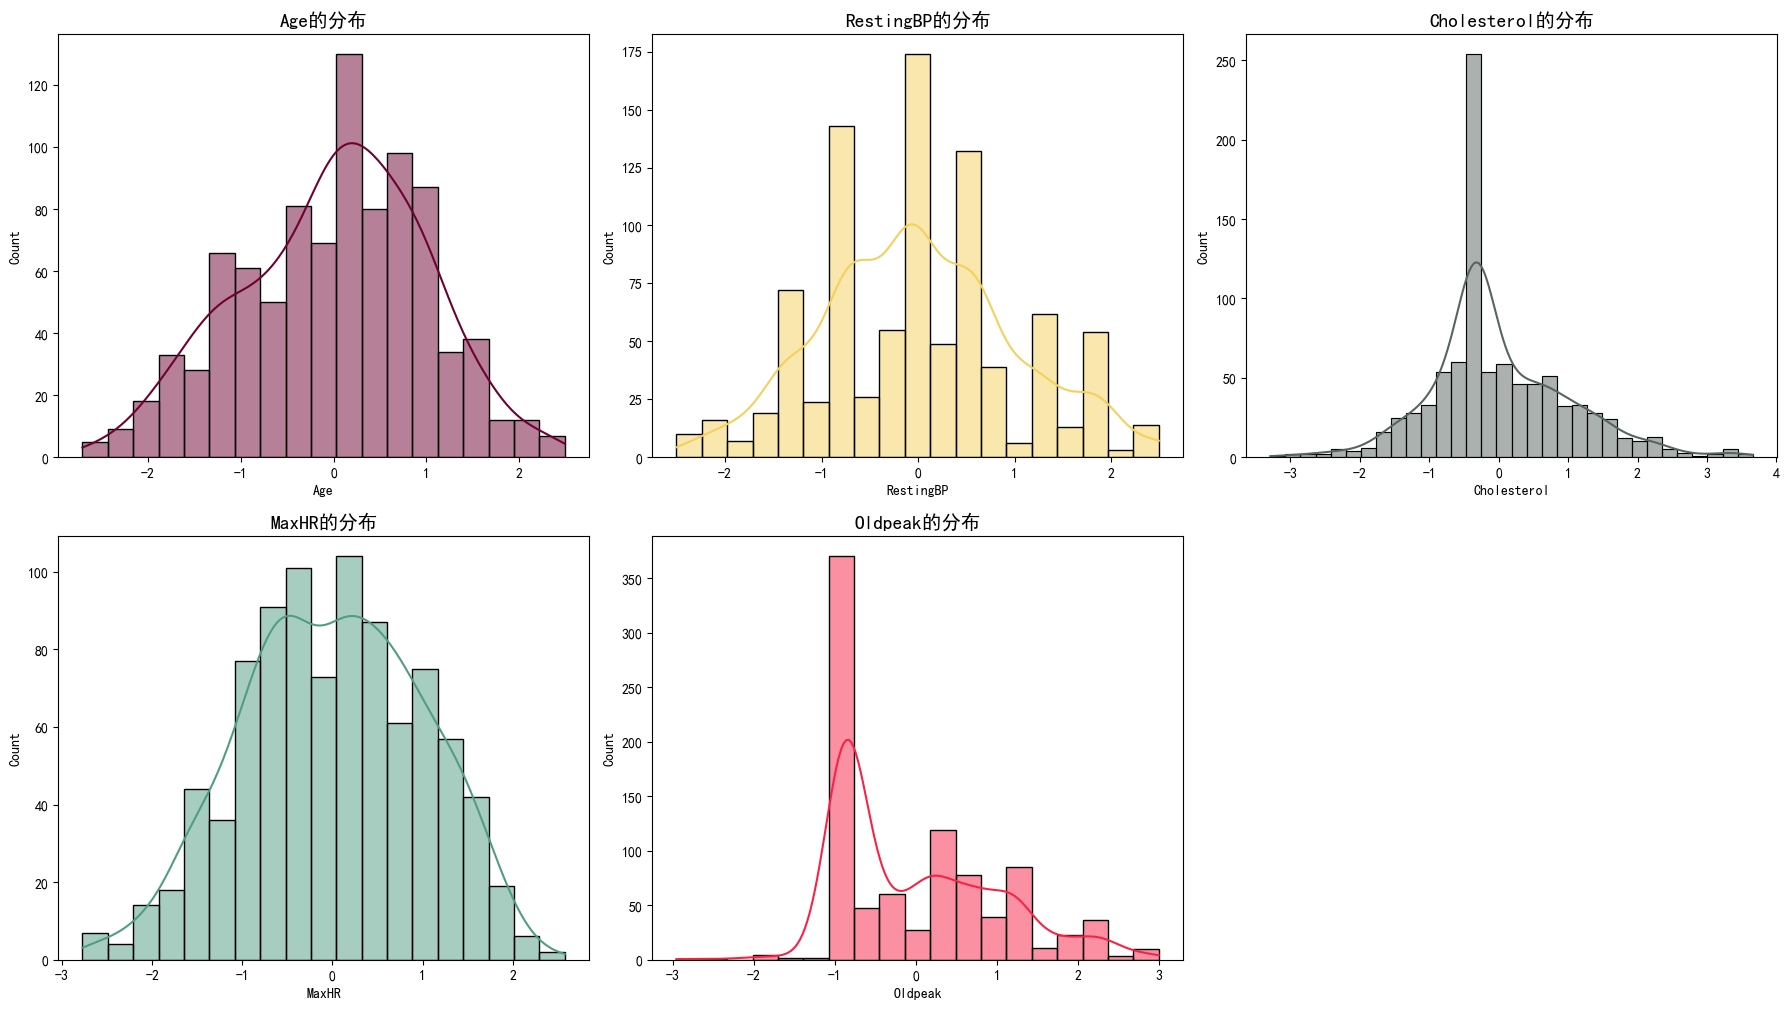

In [88]:
# 数值特征分布（直方图 + KDE）
fig, axes = plt.subplots(10, 3, figsize=(18, 50)) # 2行3列的子图
axes = axes.ravel() # 将轴数组展平

for i, col in enumerate(num_cols):
    sns.histplot(data=train_df_std, x=col, kde=True, ax=axes[i],color=np.random.rand(3,)) # kde=True 增加密度曲线
    axes[i].set_title(f'{col}的分布', fontsize=14)
    
# 如果子图数量多于特征，隐藏多余的子图
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)
    
plt.tight_layout()
plt.show()

### 3.2 数据编码

#### 3.2.1 识别二分类和多分类字段

In [89]:
# # 1. 识别二分类和多分类字段
# binary_cols = []  # 二分类字段（仅两个不同取值）
# multi_cols = []   # 多分类字段（两个以上不同取值）

In [90]:
# for col in categorical_cols:
#     unique_vals = train_df_std[col].nunique()
#     if unique_vals == 2:
#         binary_cols.append(col)
#     else:
#         multi_cols.append(col)

In [91]:
# print("\n=== 字段分类 ===")
# print(f"二分类字段（采用0-1编码）：{binary_cols}")
# print(f"多分类字段（采用独热编码）：{multi_cols}")

#### 3.3.2 二分类字段进行0-1编码

In [92]:
# train_df_encoded = train_df_std.copy()
# for col in binary_cols:
#     # 获取该字段的两个唯一值
#     vals = train_df_std[col].unique()
#     # 映射为0和1（将第一个值映射为0，第二个值映射为1）
#     train_df_encoded[col] = train_df_encoded[col].map({vals[0]: 0, vals[1]: 1})
#     print(f"\n{col}字段0-1编码映射：{vals[0]}→0，{vals[1]}→1")

#### 3.3.3 多分类字段进行独热编码

In [93]:
# # 3. 多分类字段进行独热编码
# train_df_encoded = pd.get_dummies(train_df_encoded, columns=multi_cols, prefix=multi_cols, drop_first=True)

#### 3.3.4 对目标变量进行编码

In [94]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)
# print(f"目标变量编码映射: {dict(zip(le.classes_, le.transform(le.classes_)))}")


#### 3.3.5 展示编码前后对比（前5行）

In [95]:
# print("\n=== 编码前后数据对比（前5行） ===")
# print("原始数据（部分字段）：")
# print(train_df_std[categorical_cols[:5]].head())

# print("\n编码后数据（部分字段）：")
# # 选取部分编码后的字段展示
# encoded_sample_cols = binary_cols[:2] + [col for col in train_df_encoded.columns if any(col.startswith(p) for p in multi_cols[:2])]
# print(train_df_encoded[encoded_sample_cols].head())

## 四、特征工程

### 4.1 特征选择

#### 4.1.1 相关性计算 ---- 数值型

In [96]:
# 对目标变量进行编码
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"目标变量编码映射: {dict(zip(le.classes_, le.transform(le.classes_)))}")

目标变量编码映射: {0: 0, 1: 1}


In [97]:
# 1. 数值型特征与目标变量的皮尔逊相关系数
print("=== 数值型特征与目标变量的皮尔逊相关系数 ===")
y_series = pd.Series(y_encoded, name='target')
numerical_corr = train_df_std[num_cols].corrwith(y_series)
numerical_corr = numerical_corr.sort_values(ascending=False)
print(numerical_corr.round(4))

=== 数值型特征与目标变量的皮尔逊相关系数 ===
Oldpeak        0.4036
Age            0.2820
RestingBP      0.1080
Cholesterol    0.0461
MaxHR         -0.3984
dtype: float64


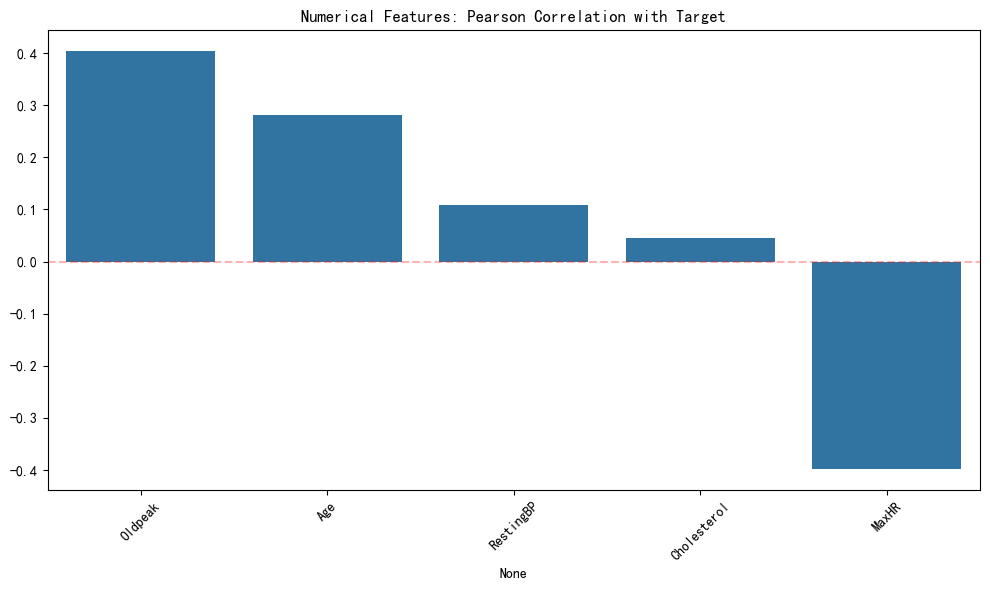

In [98]:
# 可视化皮尔逊相关系数
plt.figure(figsize=(10, 6))
sns.barplot(x=numerical_corr.index, y=numerical_corr.values)
plt.title('Numerical Features: Pearson Correlation with Target')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 4.1.2 相关性计算 ----- 分类特征

In [99]:
# 5. 分类型特征与目标变量的卡方检验（编码前，使用原始分类）
from scipy.stats import pointbiserialr, chi2_contingency
print("\n=== 分类型特征与目标变量的卡方检验（编码前） ===")
categorical_chi2 = []
for col in categorical_cols:
    # 构建列联表
    contingency = pd.crosstab(train_df[col], y_encoded)
    # 卡方检验
    chi2, p, dof, expected = chi2_contingency(contingency)
    categorical_chi2.append({
        'Feature': col,
        'Chi2 Score': chi2,  # 卡方统计量（值越大，相关性越强）
        'P-value': p,     # 显著性水平（P < 0.05 表示显著相关）
        'Significant': p < 0.05   # 是否显著（布尔值）
    })
chi2_results = pd.DataFrame(categorical_chi2)

# 按卡方值排序（值越大相关性可能越高）
chi2_results = chi2_results.sort_values(by='Chi2 Score', ascending=False)
print(chi2_results.head(10).round(4))  # 显示前10个特征


=== 分类型特征与目标变量的卡方检验（编码前） ===
          Feature  Chi2 Score  P-value  Significant
5        ST_Slope    355.9184   0.0000         True
2   ChestPainType    268.0672   0.0000         True
4  ExerciseAngina    222.2594   0.0000         True
1             Sex     84.1451   0.0000         True
0       FastingBS     64.3207   0.0000         True
3      RestingECG     10.9315   0.0042         True
          Feature  Chi2 Score  P-value  Significant
5        ST_Slope    355.9184   0.0000         True
2   ChestPainType    268.0672   0.0000         True
4  ExerciseAngina    222.2594   0.0000         True
1             Sex     84.1451   0.0000         True
0       FastingBS     64.3207   0.0000         True
3      RestingECG     10.9315   0.0042         True


📊 1. 卡方值条形图

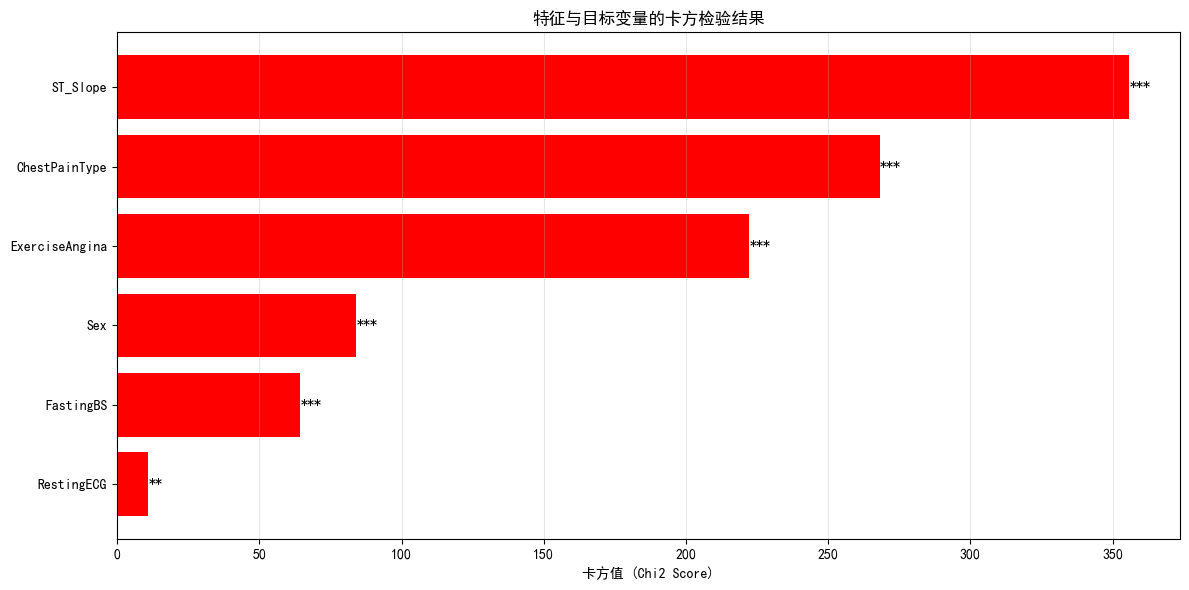

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
# 按卡方值排序
chi2_sorted = chi2_results.sort_values('Chi2 Score', ascending=True)

# 创建条形图
bars = plt.barh(chi2_sorted['Feature'], chi2_sorted['Chi2 Score'], 
                color=['red' if p < 0.05 else 'gray' for p in chi2_sorted['P-value']])

plt.xlabel('卡方值 (Chi2 Score)')
plt.title('特征与目标变量的卡方检验结果')
plt.grid(axis='x', alpha=0.3)

# 添加显著性标记
for i, (chi2, p) in enumerate(zip(chi2_sorted['Chi2 Score'], chi2_sorted['P-value'])):
    if p < 0.05:
        plt.text(chi2 + 0.1, i, '***' if p < 0.001 else '**' if p < 0.01 else '*', 
                va='center', fontweight='bold')

plt.tight_layout()
plt.show()

📈 2. 相关性热力图（多特征比较）

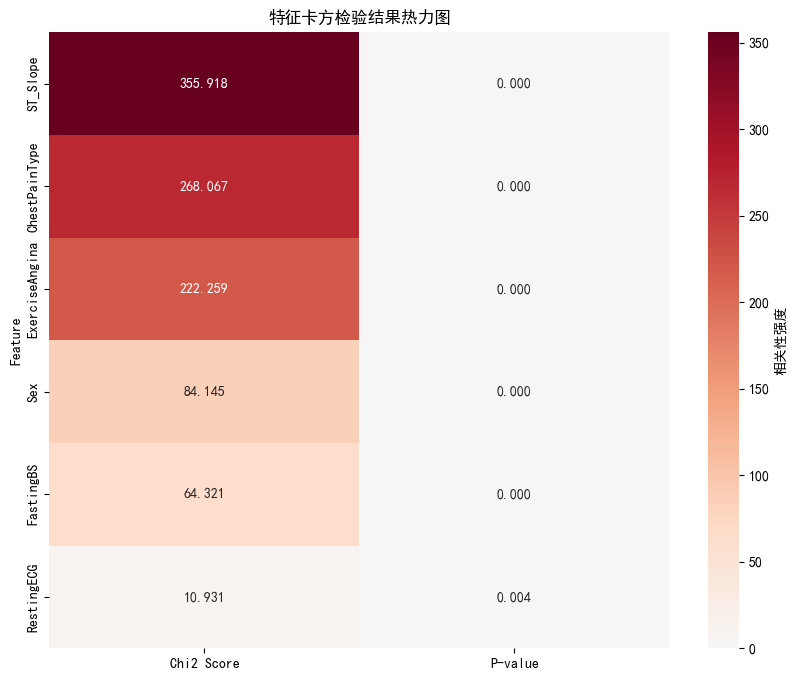

In [101]:
# 创建相关性矩阵可视化
plt.figure(figsize=(10, 8))
corr_matrix = chi2_results.set_index('Feature')[['Chi2 Score', 'P-value']]

# 使用颜色表示显著性
sns.heatmap(corr_matrix, 
           annot=True, 
           cmap='RdBu_r', 
           center=0,
           fmt='.3f',
           cbar_kws={'label': '相关性强度'})
plt.title('特征卡方检验结果热力图')
plt.show()

🎯 3. 显著性星状图

C:\Users\Man\AppData\Local\Temp\ipykernel_4720\4126319349.py:19: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from current font.
  plt.tight_layout()
e:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


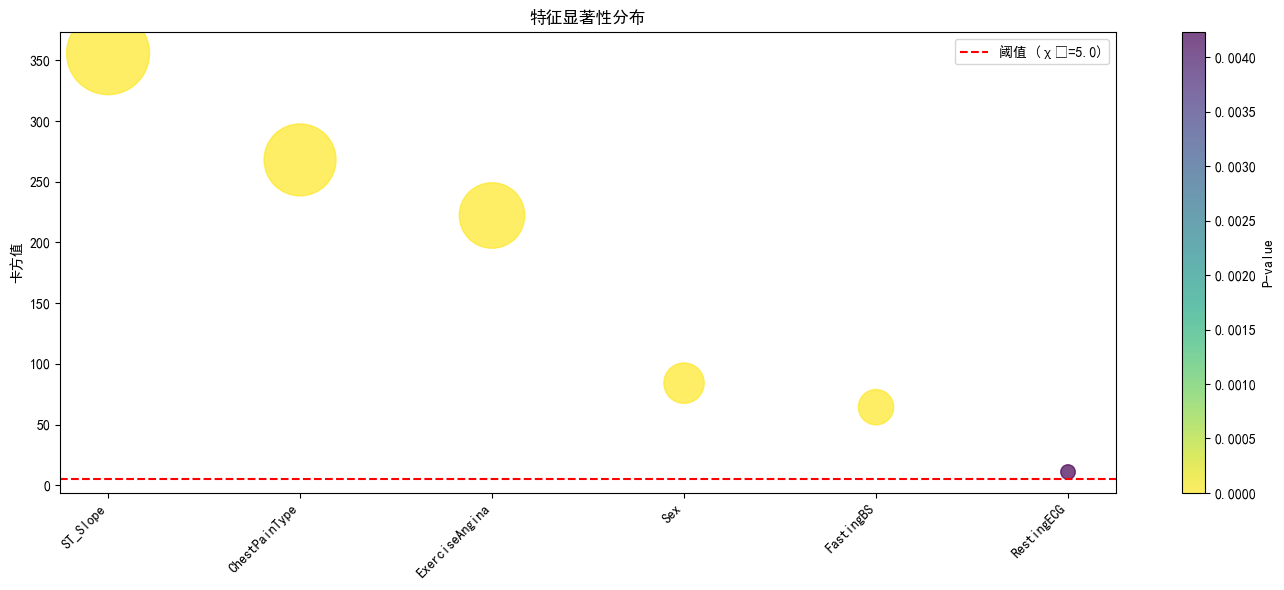

In [102]:
# 设定卡方阈值
chi2_threshold = 5.0  # 卡方值阈值

plt.figure(figsize=(14, 6))
# 创建散点图，大小表示卡方值，颜色表示显著性
scatter = plt.scatter(range(len(chi2_results)), 
                     chi2_results['Chi2 Score'],
                     s=chi2_results['Chi2 Score']*10,  # 点大小与卡方值成正比
                     c=chi2_results['P-value'],
                     cmap='viridis_r',
                     alpha=0.7)

plt.colorbar(scatter, label='P-value')
plt.axhline(y=chi2_threshold, color='red', linestyle='--', label=f'阈值 (χ²={chi2_threshold})')
plt.xticks(range(len(chi2_results)), chi2_results['Feature'], rotation=45, ha='right')
plt.ylabel('卡方值')
plt.title('特征显著性分布')
plt.legend()
plt.tight_layout()
plt.show()

In [103]:
# 对特定重要特征进行详细可视化
important_feature = 'referral source'  # 替换为实际重要特征名

if important_feature in categorical_cols:
    contingency = pd.crosstab(train_df[important_feature], y_encoded)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # 观测频数堆叠图
    contingency.plot(kind='bar', stacked=True, ax=ax1)
    ax1.set_title(f'{important_feature} - 观测频数分布')
    ax1.legend(title='目标变量')
    
    # 比例堆叠图
    (contingency.div(contingency.sum(axis=1), axis=0)).plot(kind='bar', stacked=True, ax=ax2)
    ax2.set_title(f'{important_feature} - 类别比例分布')
    ax2.legend(title='目标变量')
    
    plt.tight_layout()
    plt.show()

#### 4.1.3 特征选择

In [104]:
# 设定相关性阈值
corr_threshold = 0.1  # 皮尔逊相关系数绝对值阈值
chi2_threshold = 5.0  # 卡方值阈值

In [105]:
# 选择高相关性数值特征
selected_numerical = numerical_corr[abs(numerical_corr) >= corr_threshold].index.tolist()
# 选择高相关性分类型特征
selected_categorical = chi2_results[chi2_results['Chi2 Score'] >= chi2_threshold]['Feature'].tolist()

# 合并选择的特征
selected_features = selected_numerical + selected_categorical
print(f"\n=== 选择的特征（共{len(selected_features)}个） ===")
print(selected_features)


=== 选择的特征（共10个） ===
['Oldpeak', 'Age', 'RestingBP', 'MaxHR', 'ST_Slope', 'ChestPainType', 'ExerciseAngina', 'Sex', 'FastingBS', 'RestingECG']


In [106]:
# 生成仅包含选中特征的数据集
train_df_selected = train_df_std[selected_features]

### 4.2 特征构造 ---- 基于数据变换

#### 4.2.1 特征组合

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

def general_feature_engineering(data, numerical_cols, categorical_cols):
    """ 
    参数:
        data: 原始数据集
        numerical_cols: 数值型特征列名列表
        categorical_cols: 分类型特征列名列表
        target_col: 目标变量列名（可选，用于生成与目标的交互特征）
    返回:
        包含新特征的数据集
    """
    df = data.copy()    # 复制原始数据避免修改
    new_features = pd.DataFrame(index=df.index)
    
    # ==============================================
    # 1. 数值型特征的变换
    # ==============================================
    print("=== 数值型特征变换 ===")
    if numerical_cols:
        # 1.1 基础数学变换
        for col in numerical_cols:
            # 避免除以零和对数负数问题
            if (df[col] >= 0).all():
                new_features[f'{col}_log'] = np.log1p(df[col])  # log(1+x)变换
                new_features[f'{col}_sqrt'] = np.sqrt(df[col] + 1e-6)  # 开方变换
            
            new_features[f'{col}_square'] = df[col] **2  # 平方变换
            new_features[f'{col}_reciprocal'] = 1 / (df[col] + 1e-6)  # 倒数变换

        # 1.2 数值特征间的组合（前5对高相关特征自动组合）
        if len(numerical_cols) >= 2:
            # 计算相关性矩阵筛选高相关特征对
            corr_matrix = df[numerical_cols].corr().abs()
            # 提取上三角矩阵并筛选高相关对
            high_corr_pairs = []
            for i in range(len(numerical_cols)):
                for j in range(i+1, len(numerical_cols)):
                    if corr_matrix.iloc[i, j] > 0.3:  # 相关系数阈值
                        high_corr_pairs.append((numerical_cols[i], numerical_cols[j]))
            
            # 最多处理10对组合避免特征爆炸
            high_corr_pairs = high_corr_pairs[:10]
            print(f"选择 {len(high_corr_pairs)} 对高相关特征进行组合")
            
            # 生成组合特征
            for col1, col2 in high_corr_pairs:
                new_features[f'{col1}_plus_{col2}'] = df[col1] + df[col2]
                new_features[f'{col1}_minus_{col2}'] = df[col1] - df[col2]
                new_features[f'{col1}_times_{col2}'] = df[col1] * df[col2]
                new_features[f'{col1}_div_{col2}'] = df[col1] / (df[col2] + 1e-6)

        # 1.3 统计属性特征
        # 行级统计（每个样本的统计量）
        new_features['num_mean'] = df[numerical_cols].mean(axis=1)  # 数值特征均值
        new_features['num_std'] = df[numerical_cols].std(axis=1)   # 数值特征标准差
        new_features['num_max'] = df[numerical_cols].max(axis=1)   # 数值特征最大值
        new_features['num_min'] = df[numerical_cols].min(axis=1)   # 数值特征最小值
        new_features['num_range'] = new_features['num_max'] - new_features['num_min']  # 极差

    # ==============================================
    # 2. 分类型特征的变换
    # ==============================================
    print("\n=== 分类型特征变换 ===")
    if categorical_cols:
        # 2.1 类别频率特征（每个类别在数据集中的占比）
        for col in categorical_cols:
            freq_map = df[col].value_counts(normalize=True).to_dict()
            new_features[f'{col}_freq'] = df[col].map(freq_map)  # 类别频率
            
            # 类别计数（每个类别出现的次数）
            count_map = df[col].value_counts().to_dict()
            new_features[f'{col}_count'] = df[col].map(count_map)

        # 2.2 多类别交叉特征（前3个分类型特征的组合）
        if len(categorical_cols) >= 2:
            top_cat_cols = categorical_cols[:3]  # 取前3个类别特征
            for i in range(len(top_cat_cols)):
                for j in range(i+1, len(top_cat_cols)):
                    col1, col2 = top_cat_cols[i], top_cat_cols[j]
                    new_features[f'{col1}_x_{col2}'] = df[col1].astype(str) + "_" + df[col2].astype(str)
            
            # 对交叉特征进行编码
            cross_cols = [col for col in new_features.columns if '_x_' in col]
            new_features = pd.get_dummies(new_features, columns=cross_cols, prefix=cross_cols, drop_first=True)

    # ==============================================
    # 3. 数值-类别交互特征
    # ==============================================
    if numerical_cols and categorical_cols:
        print("\n=== 数值-类别交互特征 ===")
        # 选择1个分类型特征与所有数值特征交互（避免特征过多）
        cat_col = categorical_cols[0]
        # 计算每个类别的数值特征均值作为参考值
        for num_col in numerical_cols:
            # 按类别分组的均值
            group_mean = df.groupby(cat_col)[num_col].transform('mean')
            new_features[f'{num_col}_by_{cat_col}_ratio'] = df[num_col] / (group_mean + 1e-6)  # 与组均值的比值
            new_features[f'{num_col}_by_{cat_col}_diff'] = df[num_col] - group_mean  # 与组均值的差值

            
    # ==============================================
    # 合并特征并返回
    # ==============================================
    # 去除常量特征（标准差为0的特征）
    const_features = [col for col in new_features.columns if new_features[col].std() < 1e-6]
    if const_features:
        print(f"\n移除 {len(const_features)} 个常量特征")
        new_features = new_features.drop(columns=const_features)
    
    # 合并原始数据和新特征
    result = pd.concat([df, new_features], axis=1)
    print(f"\n特征构造完成: 原始特征 {df.shape[1]} 个，新增特征 {new_features.shape[1]} 个，总特征 {result.shape[1]} 个")
    
    return result


In [108]:
# 执行特征构造
train_df_features = general_feature_engineering(
    data=train_df_std,
    numerical_cols=num_cols,
    categorical_cols=categorical_cols,
)

=== 数值型特征变换 ===
选择 1 对高相关特征进行组合

=== 分类型特征变换 ===

=== 数值-类别交互特征 ===

特征构造完成: 原始特征 11 个，新增特征 58 个，总特征 69 个


In [109]:
train_df_features.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,Age_by_FastingBS_ratio,Age_by_FastingBS_diff,RestingBP_by_FastingBS_ratio,RestingBP_by_FastingBS_diff,Cholesterol_by_FastingBS_ratio,Cholesterol_by_FastingBS_diff,MaxHR_by_FastingBS_ratio,MaxHR_by_FastingBS_diff,Oldpeak_by_FastingBS_ratio,Oldpeak_by_FastingBS_diff
0,-1.432359,M,ATA,0.571928,1.112597,0,Normal,1.388977,N,-0.865766,...,13.125659,-1.323231,-21.075893,0.599066,66.152967,1.095780,18.484947,1.313837,19.078645,-0.820386
1,-0.478223,F,NAP,1.854209,-1.239583,0,Normal,0.754451,N,0.178065,...,4.382275,-0.369095,-68.328720,1.881347,-73.703323,-1.256401,10.040468,0.679311,-3.923977,0.223445
2,-1.750404,M,ATA,-0.069212,0.983119,0,ST,-1.545708,N,-0.865766,...,16.040120,-1.641277,2.550520,-0.042075,58.454456,0.966302,-20.570770,-1.620848,19.078645,-0.820386
3,-0.584238,F,ASY,0.443700,-0.505876,0,Normal,-1.149129,Y,0.699981,...,5.353762,-0.475110,-16.350611,0.470838,-30.078425,-0.522693,-15.292971,-1.224269,-15.425287,0.745361
4,0.051853,M,NAP,1.213068,-0.915889,0,Normal,-0.593918,N,-0.865766,...,-0.475161,0.160980,-44.702307,1.240206,-54.457044,-0.932706,-7.904051,-0.669058,19.078645,-0.820386


#### 4.2.2 构造后的特征类型识别

In [110]:
# 识别数值型特征
numeric_cols_features = train_df_features.select_dtypes(include=[np.number]).columns 

potential_categorical_features = []
num_cols_features = []  # 真正的连续数值特征

for col in numeric_cols_features:
    if train_df_features[col].nunique() <= 11 :
        potential_categorical_features.append(col)
    else:
        num_cols_features.append(col)

text_cols_features = train_df_features.select_dtypes(include=['object', 'category']).columns.tolist() 

# 数值型分类特征与文本特征汇总为分类特征
if len(potential_categorical_features)==0:
    categorical_cols_features = text_cols_features
else:
    categorical_cols_features = potential_categorical_features + text_cols_features

#### 4.2.3 对构造后的特征进行相关性计算

In [111]:
# 1. 数值型特征与目标变量的皮尔逊相关系数
print("=== 数值型特征与目标变量的皮尔逊相关系数 ===")
y_series = pd.Series(y_encoded, name='target')
numerical_corr = train_df_features[num_cols_features].corrwith(y_series)
numerical_corr = numerical_corr.sort_values(ascending=False)
print(numerical_corr.round(4))

=== 数值型特征与目标变量的皮尔逊相关系数 ===
Age_minus_MaxHR                   0.4089
Oldpeak                           0.4036
Oldpeak_by_FastingBS_diff         0.3829
Age                               0.2820
Age_by_FastingBS_diff             0.2337
Oldpeak_square                    0.2039
num_mean                          0.1882
Oldpeak_reciprocal                0.1266
num_max                           0.1080
RestingBP                         0.1080
RestingBP_by_FastingBS_diff       0.0950
Age_times_MaxHR                   0.0902
RestingBP_square                  0.0831
num_min                           0.0608
Cholesterol_by_FastingBS_ratio    0.0563
Cholesterol_by_FastingBS_diff     0.0543
num_range                         0.0471
Cholesterol                       0.0461
Age_reciprocal                    0.0424
num_std                           0.0383
RestingBP_reciprocal              0.0004
Age_div_MaxHR                    -0.0116
Cholesterol_square               -0.0288
MaxHR_square                  

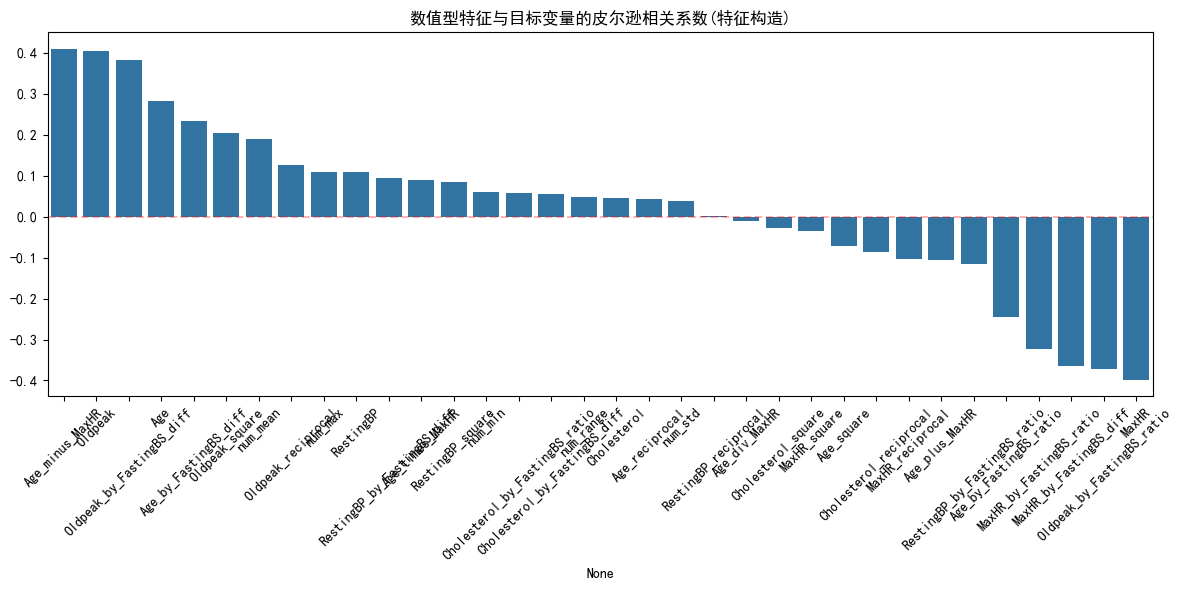

In [112]:
# 可视化皮尔逊相关系数
plt.figure(figsize=(12, 6))
sns.barplot(x=numerical_corr.index, y=numerical_corr.values)
plt.title('数值型特征与目标变量的皮尔逊相关系数(特征构造)')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [113]:
# 2. 分类型特征与目标变量的卡方检验（编码前，使用原始分类）
from scipy.stats import pointbiserialr, chi2_contingency
print("\n=== 分类型特征与目标变量的卡方检验（编码前） ===")
categorical_chi2 = []
for col in categorical_cols_features:
    # 构建列联表
    contingency = pd.crosstab(train_df_features[col], y_encoded)
    # 卡方检验
    chi2, p, dof, expected = chi2_contingency(contingency)
    categorical_chi2.append({
        'Feature': col,
        'Chi2 Score': chi2,  # 卡方统计量（值越大，相关性越强）
        'P-value': p,     # 显著性水平（P < 0.05 表示显著相关）
        'Significant': p < 0.05   # 是否显著（布尔值）
    })
chi2_results = pd.DataFrame(categorical_chi2)

# 按卡方值排序（值越大相关性可能越高）
chi2_results = chi2_results.sort_values(by='Chi2 Score', ascending=False)
print(chi2_results.head(15).round(4))  # 显示前15个特征


=== 分类型特征与目标变量的卡方检验（编码前） ===
                 Feature  Chi2 Score  P-value  Significant
17              ST_Slope    355.9184      0.0         True
12        ST_Slope_count    355.9184      0.0         True
11         ST_Slope_freq    355.9184      0.0         True
14         ChestPainType    268.0672      0.0         True
5     ChestPainType_freq    268.0672      0.0         True
6    ChestPainType_count    268.0672      0.0         True
10  ExerciseAngina_count    222.2594      0.0         True
16        ExerciseAngina    222.2594      0.0         True
9    ExerciseAngina_freq    222.2594      0.0         True
4              Sex_count     84.1451      0.0         True
13                   Sex     84.1451      0.0         True
3               Sex_freq     84.1451      0.0         True
0              FastingBS     64.3207      0.0         True
1         FastingBS_freq     64.3207      0.0         True
2        FastingBS_count     64.3207      0.0         True


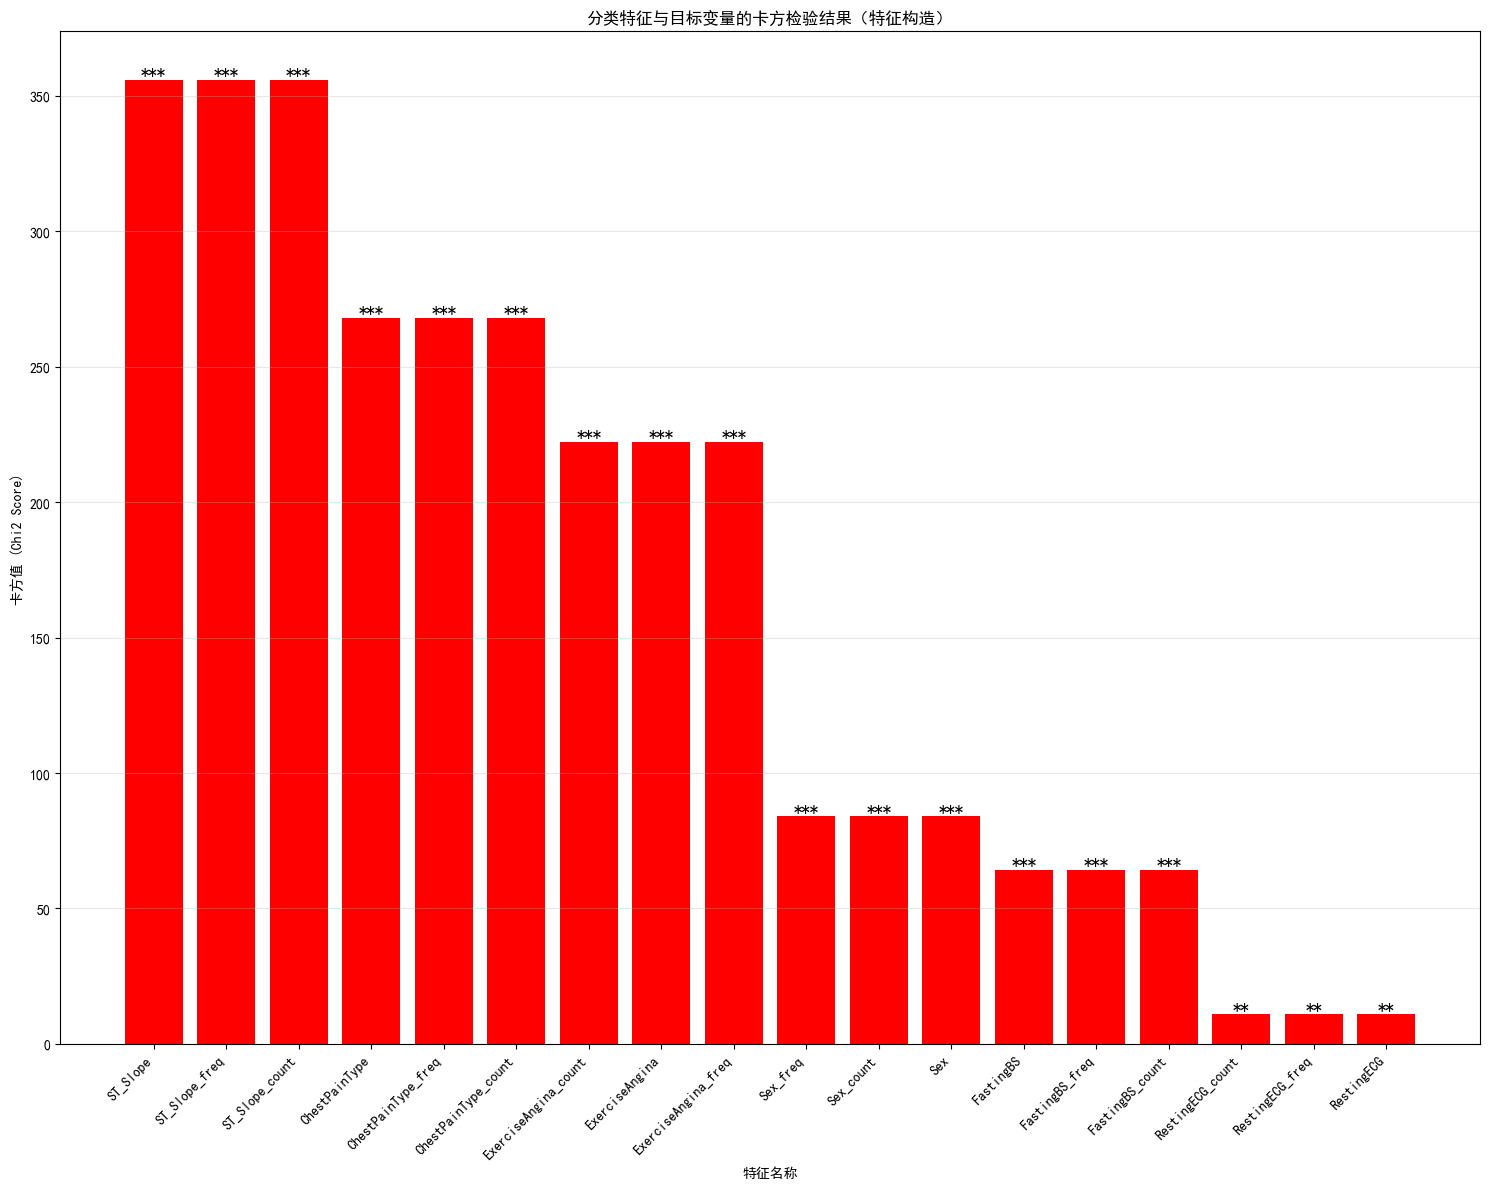

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(15, 12))  # 调整图形尺寸以适应转置

# 按卡方值排序（改为降序排列，便于阅读）
chi2_sorted = chi2_results.sort_values('Chi2 Score', ascending=False)

# 创建条形图（转置：使用bar而不是barh）
bars = plt.bar(range(len(chi2_sorted)), chi2_sorted['Chi2 Score'], 
                color=['red' if p < 0.05 else 'gray' for p in chi2_sorted['P-value']])

plt.ylabel('卡方值 (Chi2 Score)')  # Y轴标签
plt.xlabel('特征名称')  # X轴标签
plt.title('分类特征与目标变量的卡方检验结果（特征构造）')
plt.grid(axis='y', alpha=0.3)  # 网格线改为Y轴

# 设置X轴刻度（特征名称）
plt.xticks(range(len(chi2_sorted)), chi2_sorted['Feature'], rotation=45, ha='right')

# 添加显著性标记
for i, (chi2, p) in enumerate(zip(chi2_sorted['Chi2 Score'], chi2_sorted['P-value'])):
    if p < 0.05:
        plt.text(i, chi2 + 0.1, '***' if p < 0.001 else '**' if p < 0.01 else '*', 
                ha='center', fontweight='bold', fontsize=12)

# 调整布局防止标签重叠
plt.tight_layout()
plt.show()

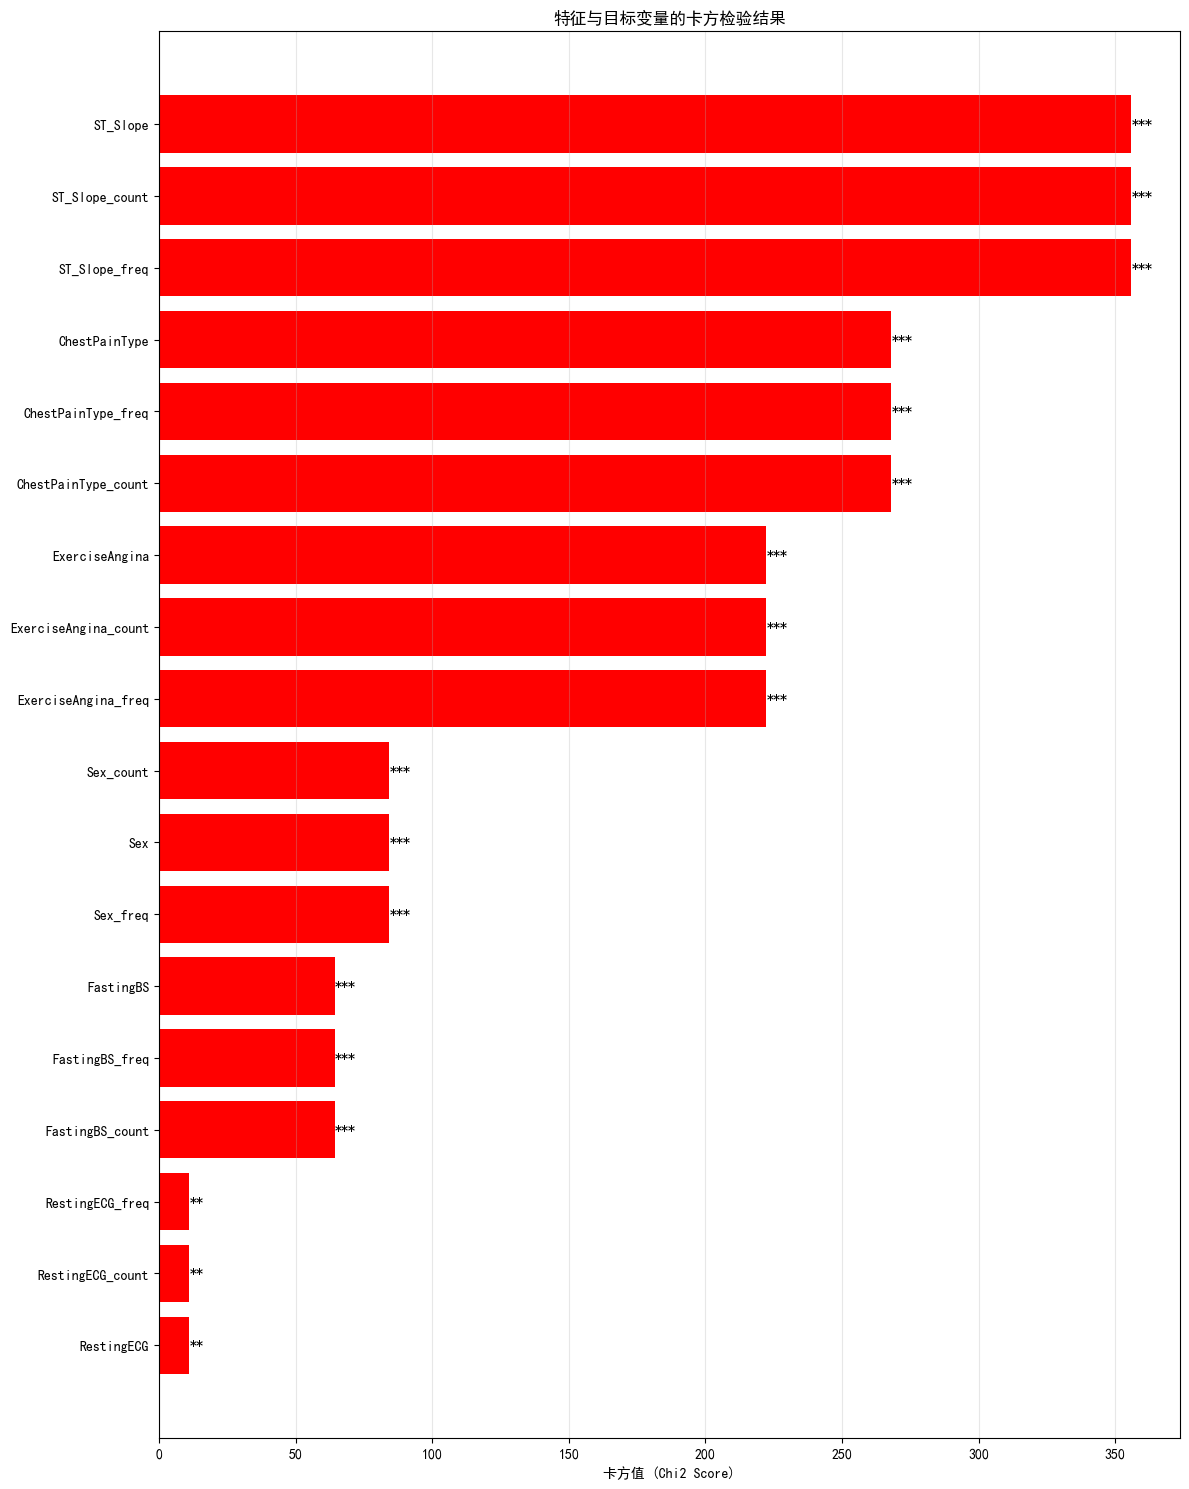

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 15))
# 按卡方值排序
chi2_sorted = chi2_results.sort_values('Chi2 Score', ascending=True)

# 创建条形图
bars = plt.barh(chi2_sorted['Feature'], chi2_sorted['Chi2 Score'], 
                color=['red' if p < 0.05 else 'gray' for p in chi2_sorted['P-value']])

plt.xlabel('卡方值 (Chi2 Score)')
plt.title('特征与目标变量的卡方检验结果')
plt.grid(axis='x', alpha=0.3)

# 添加显著性标记
for i, (chi2, p) in enumerate(zip(chi2_sorted['Chi2 Score'], chi2_sorted['P-value'])):
    if p < 0.05:
        plt.text(chi2 + 0.1, i, '***' if p < 0.001 else '**' if p < 0.01 else '*', 
                va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [116]:
# 设定相关性阈值
corr_threshold = 0.1  # 皮尔逊相关系数绝对值阈值
chi2_threshold = 5.0  # 卡方值阈值

In [117]:
# 选择重要特征

# 选择高相关性数值特征
selected_numerical = numerical_corr[abs(numerical_corr) >= corr_threshold].index.tolist()
# 选择高相关性分类型特征
selected_categorical = chi2_results[chi2_results['Chi2 Score'] >= chi2_threshold]['Feature'].tolist()

# 合并选择的特征
selected_features = selected_numerical + selected_categorical
print(f"\n=== 选择的特征（共{len(selected_features)}个） ===")
print(selected_features)


=== 选择的特征（共36个） ===
['Age_minus_MaxHR', 'Oldpeak', 'Oldpeak_by_FastingBS_diff', 'Age', 'Age_by_FastingBS_diff', 'Oldpeak_square', 'num_mean', 'Oldpeak_reciprocal', 'num_max', 'RestingBP', 'MaxHR_reciprocal', 'Age_plus_MaxHR', 'RestingBP_by_FastingBS_ratio', 'Age_by_FastingBS_ratio', 'MaxHR_by_FastingBS_ratio', 'MaxHR_by_FastingBS_diff', 'Oldpeak_by_FastingBS_ratio', 'MaxHR', 'ST_Slope', 'ST_Slope_count', 'ST_Slope_freq', 'ChestPainType', 'ChestPainType_freq', 'ChestPainType_count', 'ExerciseAngina_count', 'ExerciseAngina', 'ExerciseAngina_freq', 'Sex_count', 'Sex', 'Sex_freq', 'FastingBS', 'FastingBS_freq', 'FastingBS_count', 'RestingECG_count', 'RestingECG_freq', 'RestingECG']


In [118]:
# 生成仅包含选中特征的数据集
train_df_selected = train_df_features[selected_features]

### 4.3 特征编码

In [119]:
# 识别数值型特征
numeric_cols_features = train_df_selected.select_dtypes(include=[np.number]).columns 

potential_categorical_features = []
num_cols_features = []  # 真正的连续数值特征

for col in numeric_cols_features:
    if train_df_selected[col].nunique() <= 11 :
        potential_categorical_features.append(col)
    else:
        num_cols_features.append(col)

text_cols_features = train_df_selected.select_dtypes(include=['object', 'category']).columns.tolist() 

# 数值型分类特征与文本特征汇总为分类特征
if len(potential_categorical_features)==0:
    categorical_cols_features = text_cols_features
else:
    categorical_cols_features = potential_categorical_features + text_cols_features

#### 4.3.1 识别二分类和多分类字段

In [120]:
# 1. 识别二分类和多分类字段
binary_cols = []  # 二分类字段（仅两个不同取值）
multi_cols = []   # 多分类字段（两个以上不同取值）

for col in categorical_cols_features:
    unique_vals = train_df_selected[col].nunique()
    if unique_vals == 2:
        binary_cols.append(col)
    else:
        multi_cols.append(col)

print("\n=== 字段分类 ===")
print(f"二分类字段（采用0-1编码）：{binary_cols}")
print(f"多分类字段（采用独热编码）：{multi_cols}")


=== 字段分类 ===
二分类字段（采用0-1编码）：['ExerciseAngina_count', 'ExerciseAngina_freq', 'Sex_count', 'Sex_freq', 'FastingBS', 'FastingBS_freq', 'FastingBS_count', 'ExerciseAngina', 'Sex']
多分类字段（采用独热编码）：['ST_Slope_count', 'ST_Slope_freq', 'ChestPainType_freq', 'ChestPainType_count', 'RestingECG_count', 'RestingECG_freq', 'ST_Slope', 'ChestPainType', 'RestingECG']


#### 4.3.2 二分类字段进行0-1编码

In [121]:
train_df_encoded = train_df_selected.copy()
for col in binary_cols:
    # 获取该字段的两个唯一值
    vals = train_df_selected[col].unique()
    # 映射为0和1（将第一个值映射为0，第二个值映射为1）
    train_df_encoded[col] = train_df_encoded[col].map({vals[0]: 0, vals[1]: 1})
    print(f"\n{col}字段0-1编码映射：{vals[0]}→0，{vals[1]}→1")


ExerciseAngina_count字段0-1编码映射：547→0，371→1

ExerciseAngina_freq字段0-1编码映射：0.5958605664488017→0，0.40413943355119825→1

Sex_count字段0-1编码映射：725→0，193→1

Sex_freq字段0-1编码映射：0.789760348583878→0，0.210239651416122→1

FastingBS字段0-1编码映射：0→0，1→1

FastingBS_freq字段0-1编码映射：0.7668845315904139→0，0.23311546840958605→1

FastingBS_count字段0-1编码映射：704→0，214→1

ExerciseAngina字段0-1编码映射：N→0，Y→1

Sex字段0-1编码映射：M→0，F→1


#### 4.3.3 多分类字段进行独热编码

In [122]:
# 3. 多分类字段进行独热编码
train_df_encoded = pd.get_dummies(train_df_encoded, columns=multi_cols, prefix=multi_cols, drop_first=True)

#### 4.3.4 展示编码前后对比（前5行）

In [123]:
print("\n=== 编码前后数据对比（前5行） ===")
print("原始数据（部分字段）：")
print(train_df_selected[categorical_cols_features[:3]].head())

print("\n编码后数据（部分字段）：")
# 选取部分编码后的字段展示
encoded_sample_cols = binary_cols[:3] + [col for col in train_df_encoded.columns if any(col.startswith(p) for p in multi_cols[:3])]
print(train_df_encoded[encoded_sample_cols].head())


=== 编码前后数据对比（前5行） ===
原始数据（部分字段）：
   ST_Slope_count  ST_Slope_freq  ChestPainType_freq
0             395       0.430283            0.188453
1             460       0.501089            0.221133
2             395       0.430283            0.188453
3             460       0.501089            0.540305
4             395       0.430283            0.221133

编码后数据（部分字段）：
   ExerciseAngina_count  ExerciseAngina_freq  Sex_count  ST_Slope_count_395  \
0                     0                    0          0                True   
1                     0                    0          1               False   
2                     0                    0          0                True   
3                     1                    1          1               False   
4                     0                    0          0                True   

   ST_Slope_count_460  ST_Slope_freq_0.43028322440087147  \
0               False                               True   
1                True                 

###  4.4 特征工程前后特征数量对比

C:\Users\Man\AppData\Local\Temp\ipykernel_4720\969603320.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


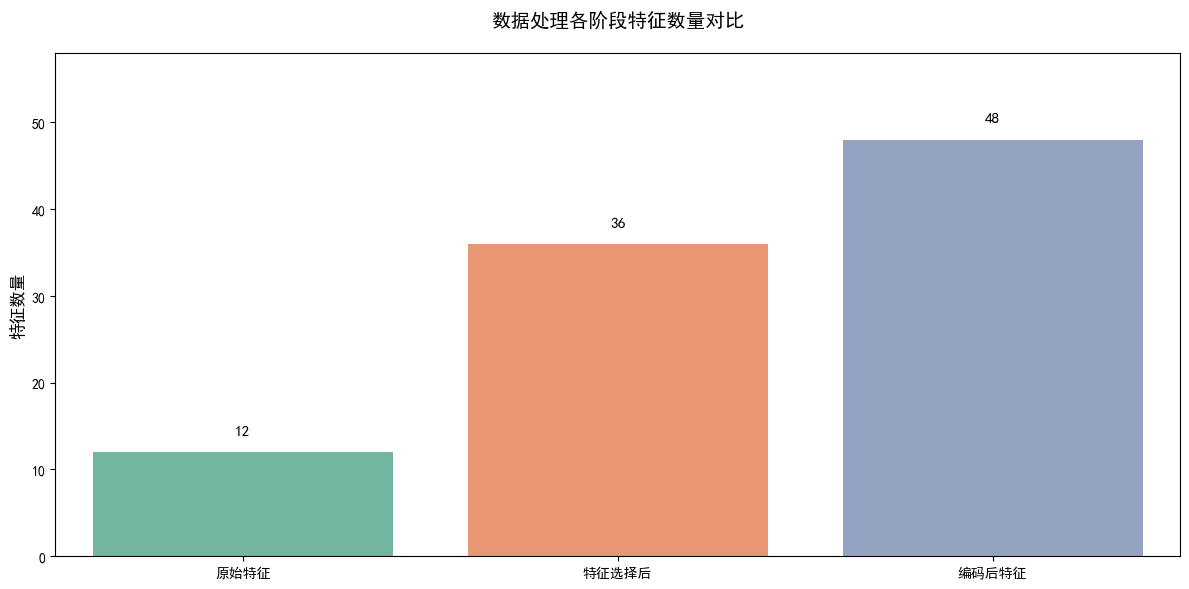

In [124]:
pre_process_features = train_data.shape[1]
post_encoding_features = train_df_encoded.shape[1]
post_selection_features = train_df_selected.shape[1]

plt.figure(figsize=(12, 6))


sns.barplot(
    x=['原始特征', '特征选择后', '编码后特征'],  # x轴：数据处理阶段
    y=[pre_process_features, post_selection_features, post_encoding_features],  # y轴：特征数量
    palette='Set2',  
)
plt.title('数据处理各阶段特征数量对比', fontsize=14, pad=20)  # pad：标题与图表间距
plt.ylabel('特征数量', fontsize=12)  
plt.ylim(0, max([pre_process_features, post_encoding_features, post_selection_features]) + 10)  # 预留标签空间

# 为每个条形添加“特征数量”标签（避免标签超出画布）
for i, v in enumerate([pre_process_features, post_selection_features, post_encoding_features]):
    plt.text(
        i, v + 2,  # 标签位置：x=条形索引，y=条形顶部+2（避免与条形重叠）
        str(v),    # 标签内容：特征数量
        ha='center', fontsize=11  # 居中对齐，放大字体
    )

plt.tight_layout()  # 自动调整布局，防止标签被截断
plt.show()

## 五、数据验证

In [125]:
from sklearn.model_selection import train_test_split   # 从sklearn导入数据集分割工具

X = train_df_encoded.values
Y = y_encoded
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=666)   

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV   # 导入网格搜索工具
from sklearn.metrics import accuracy_score, recall_score


# 定义参数网格，用于网格搜索
param_grid_dt = {
    'criterion': ['gini','entropy'],  # 划分标准：基尼不纯度或信息增益
    'max_depth': [i for i in range(1,10)],  # 树的最大深度
}
dt_clf = DecisionTreeClassifier(random_state=42)   # 创建决策树分类器实例
grid_search_dt = GridSearchCV(dt_clf, param_grid_dt)  # 创建网格搜索实例
grid_search_dt.fit(X_train, y_train)  # 在训练集上执行网格搜索
dt_clf = grid_search_dt.best_estimator_  # 获取最佳模型
# 在测试集上评估
y_pred = dt_clf.predict(X_test)

print('决策树准确率：',dt_clf.score(X_test,y_test))     # 打印最佳模型在测试集上的准确率
print(f'测试集召回率：{recall_score(y_test, y_pred, average="binary"):.4f}')  # 二分类问题

决策树准确率： 0.8097826086956522
测试集召回率：0.8350
